## Student grades prediction

In [39]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [40]:
df=pd.read_csv("Grades.csv")

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 571 entries, 0 to 570
Data columns (total 43 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Seat No.   571 non-null    object 
 1   PH-121     571 non-null    object 
 2   HS-101     571 non-null    object 
 3   CY-105     570 non-null    object 
 4   HS-105/12  570 non-null    object 
 5   MT-111     569 non-null    object 
 6   CS-105     571 non-null    object 
 7   CS-106     569 non-null    object 
 8   EL-102     569 non-null    object 
 9   EE-119     569 non-null    object 
 10  ME-107     569 non-null    object 
 11  CS-107     569 non-null    object 
 12  HS-205/20  566 non-null    object 
 13  MT-222     566 non-null    object 
 14  EE-222     564 non-null    object 
 15  MT-224     564 non-null    object 
 16  CS-210     564 non-null    object 
 17  CS-211     566 non-null    object 
 18  CS-203     566 non-null    object 
 19  CS-214     565 non-null    object 
 20  EE-217    

In [13]:
df.describe()

,CGPA
count,571.000000
mean,2.954888
std,0.620552
min,0.800000
25%,2.538000
50%,3.029000
75%,3.451000
max,3.985000


In [14]:
df.head()

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,CS-97001,B-,D+,C-,C,C-,D+,D,C-,B-,...,C-,C-,C-,C-,A-,A,C-,B,A-,2.205
1,CS-97002,A,D,D+,D,B-,C,D,A,D+,...,D+,D,C,D,A-,B-,C,C,B,2.008
2,CS-97003,A,B,A,B-,B+,A,B-,B+,A-,...,B,B,A,C,A,A,A,A-,A,3.608
3,CS-97004,D,C+,D+,D,D,A-,D+,C-,D,...,D+,C,D+,C-,B-,B,C+,C+,C+,1.906
4,CS-97005,A-,A-,A-,B+,A,A,A-,B+,A,...,B-,B+,B+,B-,A-,A,A-,A-,A,3.448


In [15]:
df.shape

(571, 43)

In [42]:
print(f"The rows and columns in the dataset: {df.shape}")
print(f"\nThe column headers in the dataset: {df.columns}")

The rows and columns in the dataset: (571, 43)

The column headers in the dataset: Index(['Seat No.', 'PH-121', 'HS-101', 'CY-105', 'HS-105/12', 'MT-111',
       'CS-105', 'CS-106', 'EL-102', 'EE-119', 'ME-107', 'CS-107', 'HS-205/20',
       'MT-222', 'EE-222', 'MT-224', 'CS-210', 'CS-211', 'CS-203', 'CS-214',
       'EE-217', 'CS-212', 'CS-215', 'MT-331', 'EF-303', 'HS-304', 'CS-301',
       'CS-302', 'TC-383', 'MT-442', 'EL-332', 'CS-318', 'CS-306', 'CS-312',
       'CS-317', 'CS-403', 'CS-421', 'CS-406', 'CS-414', 'CS-419', 'CS-423',
       'CS-412', 'CGPA'],
      dtype='object')


In [43]:
missing_val = df.isnull().sum().to_frame("Null values")

missing_val["% of missing"] = round(missing_val['Null values'] / len(df) * 100,2)

missing_val

,Null values,% of missing
Seat No.,0,0.00
PH-121,0,0.00
HS-101,0,0.00
CY-105,1,0.18
HS-105/12,1,0.18
MT-111,2,0.35
CS-105,0,0.00
CS-106,2,0.35
EL-102,2,0.35
EE-119,2,0.35


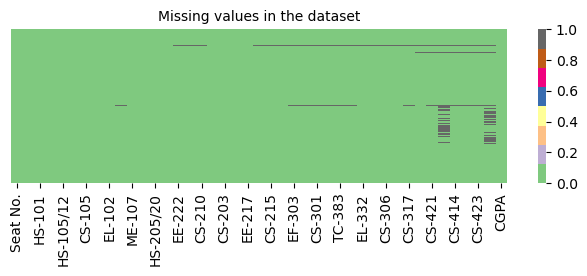

In [44]:
plt.figure(figsize=(8,2))
sns.heatmap(df.isnull(), yticklabels=False, cmap='Accent')
plt.title('Missing values in the dataset', fontsize=10);

In [45]:
df_filtered = df[df.isnull().any(axis=1)]
df_filtered

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
44,CS-97045,D,C,NaN,NaN,NaN,C-,NaN,NaN,D+,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.493
60,CS-97061,C,B+,WU,D+,C-,B-,F,D,A-,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.418
86,CS-97087,D,D,D+,B-,F,D,D,D,D+,...,D+,D,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.261
91,CS-97092,WU,C-,D,D,WU,D,D,D,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.380
137,CS-97138,C-,C+,WU,WU,WU,B,WU,WU,A-,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.653
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
423,CS-97424,D,D+,D,D,C-,C,C+,B-,C,...,D,D,D+,D,D,W,C,B,NaN,1.747
424,CS-97425,C-,D+,B-,C+,D+,C-,A-,C-,D+,...,W,C,B-,F,D+,W,D,B,NaN,1.835
481,CS-97482,B-,A-,C+,D,B,B,A-,A-,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.896
543,CS-97544,A,B,A,A-,A-,A,B+,B+,B+,...,WU,NaN,NaN,W,WU,NaN,NaN,NaN,W,3.607


In [46]:
null_count_per_row = df.isnull().sum(axis=1)
df['Null_Count'] = null_count_per_row

null_count_per_row.sort_values(ascending=False).head(15)

44     36
565    35
142    31
143    30
137    30
60     24
288    24
281    20
91     19
282    14
481     9
86      7
543     5
382     1
383     1
dtype: int64

In [47]:
threshold = len(df) * 0.05
print('threshold :', threshold)

threshold : 28.55


In [49]:
display( "Rows with more than 10 missing values: \n", df[df['Null_Count'] > 10 ])

df = df[df['Null_Count'] <= 9]

print(f"The rows and columns in the dataset: {df.shape}")

'Rows with more than 10 missing values: \n'

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA,Null_Count


The rows and columns in the dataset: (561, 44)


In [50]:
missing_val = df.isnull().sum().to_frame("Null values")

missing_val["% of missing"] = round(missing_val['Null values'] / len(df) * 100,2)

missing_val[missing_val['Null values']>0]

,Null values,% of missing
CS-312,1,0.18
CS-317,2,0.36
CS-403,3,0.53
CS-421,2,0.36
CS-406,75,13.37
CS-414,3,0.53
CS-419,3,0.53
CS-423,4,0.71
CS-412,69,12.30


In [51]:
columns_with_missing = df.columns[df.isnull().any()]
columns_with_missing

Index(['CS-312', 'CS-317', 'CS-403', 'CS-421', 'CS-406', 'CS-414', 'CS-419',
       'CS-423', 'CS-412'],
      dtype='object')

In [52]:
for column in columns_with_missing:
    print(f"Feature {column}:\n{df[column].value_counts()}\n")

Feature CS-312:
CS-312
A+    93
A     86
A-    63
D+    52
C     48
C-    44
B+    42
B     37
C+    37
B-    36
D     19
W      1
F      1
WU     1
Name: count, dtype: int64

Feature CS-317:
CS-317
B-    79
B     75
C     70
A-    66
B+    58
C+    57
A     47
C-    41
D+    34
D     16
A+     9
F      7
Name: count, dtype: int64

Feature CS-403:
CS-403
A     133
A-    106
B+     62
B-     55
B      54
D+     35
C      33
C+     32
C-     30
A+     15
D       3
Name: count, dtype: int64

Feature CS-421:
CS-421
B     86
B-    74
C     68
C+    61
C-    60
B+    60
A-    47
D+    36
A     25
D     21
F     17
A+     2
W      2
Name: count, dtype: int64

Feature CS-406:
CS-406
A-    177
A      79
B+     64
B      58
B-     22
C+     22
C      19
D+     14
C-      8
A+      8
F       6
D       5
W       3
WU      1
Name: count, dtype: int64

Feature CS-414:
CS-414
A     176
A-    156
B+     62
B      54
B-     21
A+     21
C+     21
C      20
C-     12
F       7
D+      3
D       3
W     

In [53]:
for column in columns_with_missing:
    mode_value = df[column].mode()[0]  # Get the mode (most frequent value)
    df[column].fillna(mode_value, inplace=True)
    print(f"In \"{column}\" the missing values were replace by mode: {mode_value}")

In "CS-312" the missing values were replace by mode: A+
In "CS-317" the missing values were replace by mode: B-
In "CS-403" the missing values were replace by mode: A
In "CS-421" the missing values were replace by mode: B
In "CS-406" the missing values were replace by mode: A-
In "CS-414" the missing values were replace by mode: A
In "CS-419" the missing values were replace by mode: A-
In "CS-423" the missing values were replace by mode: A-
In "CS-412" the missing values were replace by mode: A-


In [54]:
missing_val = df.isnull().sum().to_frame("Null values")

missing_val["% of missing"] = round(missing_val['Null values'] / len(df) * 100,2)

display(missing_val[missing_val['Null values']>0])

df.drop("Null_Count", axis=1, inplace=True)

,Null values,% of missing


In [55]:
info_df = df.nunique().to_frame('No. of unique values')
info_df['type'] = df.dtypes.values
info_df

,No. of unique values,type
Seat No.,561,object
PH-121,11,object
HS-101,11,object
CY-105,11,object
HS-105/12,11,object
MT-111,12,object
CS-105,11,object
CS-106,11,object
EL-102,11,object
EE-119,11,object


In [56]:
df.drop(['Seat No.'], axis=1, inplace=True)
df.sample(10)

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
500,A+,A-,A,A,A+,A,B+,A,A-,A-,...,A,B,A+,B,A,B+,B,B,B+,3.481
87,C,C,B-,C+,C-,B-,D+,C+,C+,C-,...,D+,C-,C-,C-,A-,A-,C-,B-,B+,2.378
269,B+,A-,B+,B,B,A-,B+,A-,B,D,...,C+,C+,B+,B-,B-,A-,B-,C+,B+,2.845
77,A-,B-,A,C+,B-,A-,C+,B,A-,B-,...,C,A-,A-,A-,A,A+,B,A,A,3.295
131,A-,C-,B+,B-,D+,A-,C-,B+,A-,A-,...,C-,B-,C,C,A-,A,B-,B-,A-,2.823
413,D+,D,C,D,C-,B+,B,D+,B,C,...,A,B,C+,C,B-,B+,D+,B+,A-,2.260
176,A-,C,B+,B,B+,A,A-,B,A-,D+,...,D+,D+,D+,D,B,B+,C,D+,B+,2.528
254,A,B,A,A,A-,A-,B+,A-,B+,A-,...,B-,A,B-,A-,B,A-,A-,A-,A-,3.512
184,A-,B+,A-,A-,B+,A-,B+,B-,B,C-,...,D,C+,C+,B,A-,A,C,B,A-,2.971
34,B+,B-,A-,A,C+,A-,D,A-,A-,C+,...,C,B+,B-,C+,A,A,B,A-,A-,3.160


In [57]:
print(f"The rows and columns in the dataset: {df.shape}")
print(f"\nThe column headers in the dataset: {df.columns}")

The rows and columns in the dataset: (561, 42)

The column headers in the dataset: Index(['PH-121', 'HS-101', 'CY-105', 'HS-105/12', 'MT-111', 'CS-105', 'CS-106',
       'EL-102', 'EE-119', 'ME-107', 'CS-107', 'HS-205/20', 'MT-222', 'EE-222',
       'MT-224', 'CS-210', 'CS-211', 'CS-203', 'CS-214', 'EE-217', 'CS-212',
       'CS-215', 'MT-331', 'EF-303', 'HS-304', 'CS-301', 'CS-302', 'TC-383',
       'MT-442', 'EL-332', 'CS-318', 'CS-306', 'CS-312', 'CS-317', 'CS-403',
       'CS-421', 'CS-406', 'CS-414', 'CS-419', 'CS-423', 'CS-412', 'CGPA'],
      dtype='object')


In [58]:
for column in df.columns[:-1]:
    print(f"Feature {column}:\n{df[column].value_counts()}\n")

Feature PH-121:
PH-121
A-    112
A     111
B+     61
B      57
B-     55
D      41
C      32
C+     30
D+     22
A+     22
C-     18
Name: count, dtype: int64

Feature HS-101:
HS-101
A-    82
B-    77
C     67
B     63
B+    58
C-    48
C+    45
D     44
A     38
D+    35
A+     4
Name: count, dtype: int64

Feature CY-105:
CY-105
A     177
A-    120
B+     50
B      48
B-     42
A+     31
D      28
C      19
C+     17
C-     16
D+     13
Name: count, dtype: int64

Feature HS-105/12:
HS-105/12
A     96
A-    74
B+    70
B     57
D     43
C     40
B-    40
C+    39
C-    35
A+    34
D+    33
Name: count, dtype: int64

Feature MT-111:
MT-111
A-    104
A      99
B-     70
B+     62
B      55
C-     38
C+     33
C      30
D      25
A+     23
D+     21
F       1
Name: count, dtype: int64

Feature CS-105:
CS-105
A     151
A-    133
B+     60
B      50
A+     43
B-     36
C+     23
C      22
C-     21
D+     14
D       8
Name: count, dtype: int64

Feature CS-106:
CS-106
A-    116
B+    101
B  

In [59]:
stats = df.describe()
stats

,CGPA
count,561.000000
mean,2.977501
std,0.594160
min,1.261000
25%,2.564000
50%,3.042000
75%,3.458000
max,3.985000


In [60]:
df.describe(exclude=[np.number])

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-306,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412
count,561,561,561,561,561,561,561,561,561,561,...,561,561,561,561,561,561,561,561,561,561
unique,11,11,11,11,12,11,11,11,11,11,...,13,14,12,11,13,14,13,12,12,13
top,A-,A-,A,A,A-,A,A-,A-,A-,A-,...,A-,A+,B-,A,B,A-,A,A-,A-,A-
freq,112,82,177,96,104,151,116,105,134,79,...,120,94,81,136,88,252,179,123,126,226


In [61]:
df[df.duplicated()].shape

(0, 42)

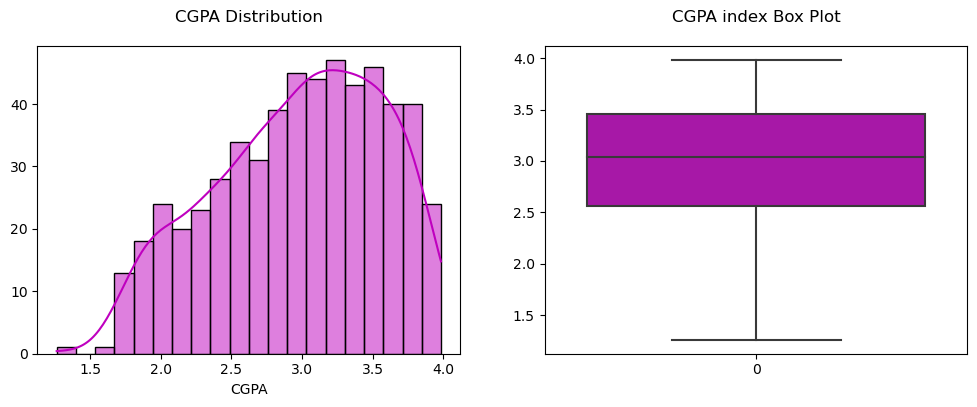

Skewness of CGPA : -0.3554277377610981


In [62]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.histplot(df['CGPA'], kde=True , bins=20, ax=axes[0], color='m')
sns.boxplot(df['CGPA'], ax=axes[1], color='m')

axes[0].set_title('CGPA Distribution', size=12, y=1.05)
axes[0].set_ylabel('', size=10, labelpad=8)

axes[1].set_title('CGPA index Box Plot', size=12, y=1.05)

plt.show()

print(f"Skewness of CGPA : {df.CGPA.skew()}")

In [63]:
categorical_col = df.columns[:-1] 
categorical_col

Index(['PH-121', 'HS-101', 'CY-105', 'HS-105/12', 'MT-111', 'CS-105', 'CS-106',
       'EL-102', 'EE-119', 'ME-107', 'CS-107', 'HS-205/20', 'MT-222', 'EE-222',
       'MT-224', 'CS-210', 'CS-211', 'CS-203', 'CS-214', 'EE-217', 'CS-212',
       'CS-215', 'MT-331', 'EF-303', 'HS-304', 'CS-301', 'CS-302', 'TC-383',
       'MT-442', 'EL-332', 'CS-318', 'CS-306', 'CS-312', 'CS-317', 'CS-403',
       'CS-421', 'CS-406', 'CS-414', 'CS-419', 'CS-423', 'CS-412'],
      dtype='object')

In [64]:
arr = []

for col in categorical_col:
    arr.extend(df[col].unique())

pd.Series(arr).unique()

array(['B-', 'A', 'D', 'A-', 'B+', 'B', 'C+', 'C', 'C-', 'D+', 'A+', 'F',
       'WU', 'W'], dtype=object)

In [65]:
order_cat = ['A+', 'A', 'A-', 'B+', 'B', 'B-', 'C+', 'C', 'C-', 'D+', 'D', 'F', 'WU', 'W' ]

for col in categorical_col:
    df[col] = pd.Categorical(df[col], categories=order_cat, ordered=True)

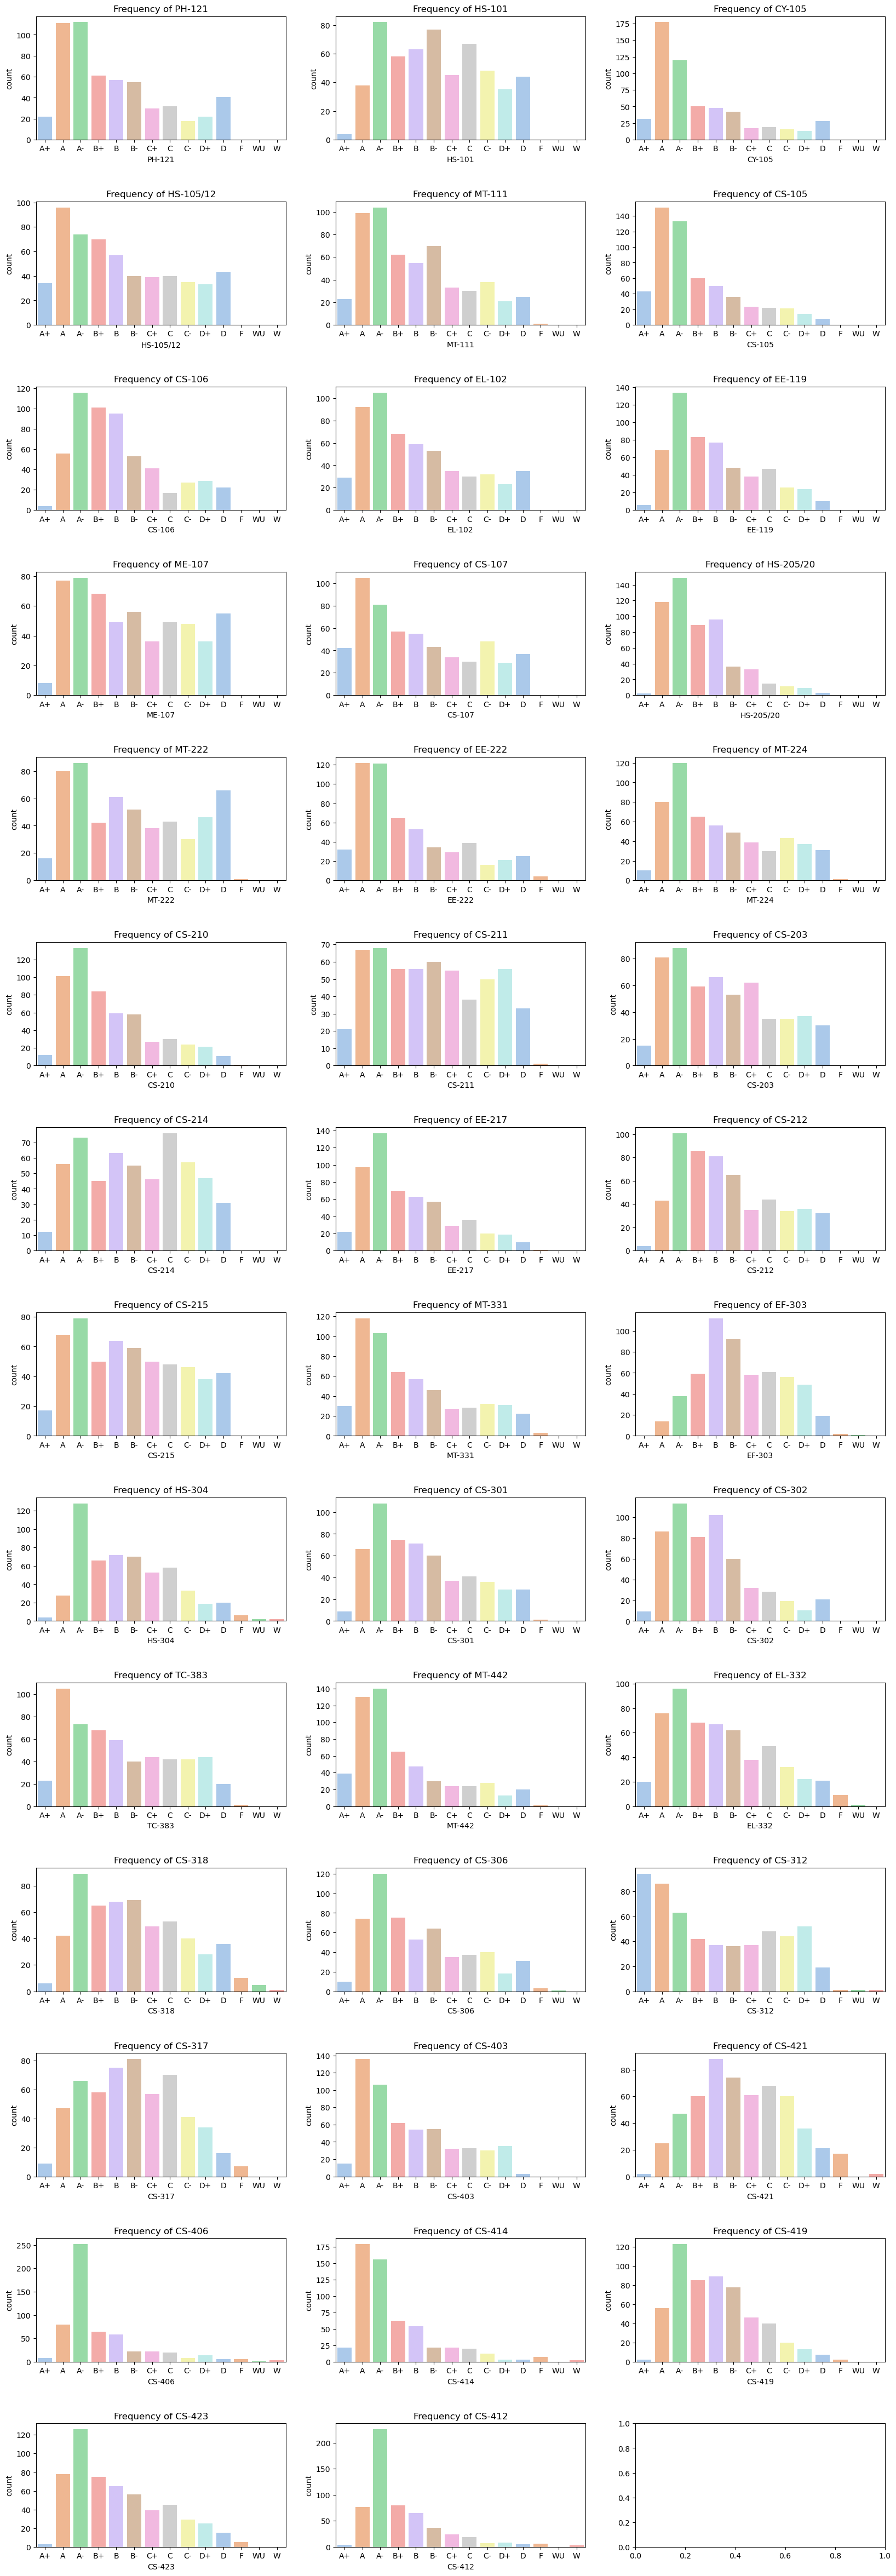

In [66]:
fig, axs = plt.subplots(14, 3, figsize=(20, 60))

for ax, column in zip(axs.flat, categorical_col):
    sns.countplot(data=df, x=column, ax=ax, palette='pastel')
    ax.set_title(f"Frequency of {column}")

plt.subplots_adjust(hspace=0.5)
plt.show()

In [67]:
categorical_col.sort_values()

Index(['CS-105', 'CS-106', 'CS-107', 'CS-203', 'CS-210', 'CS-211', 'CS-212',
       'CS-214', 'CS-215', 'CS-301', 'CS-302', 'CS-306', 'CS-312', 'CS-317',
       'CS-318', 'CS-403', 'CS-406', 'CS-412', 'CS-414', 'CS-419', 'CS-421',
       'CS-423', 'CY-105', 'EE-119', 'EE-217', 'EE-222', 'EF-303', 'EL-102',
       'EL-332', 'HS-101', 'HS-105/12', 'HS-205/20', 'HS-304', 'ME-107',
       'MT-111', 'MT-222', 'MT-224', 'MT-331', 'MT-442', 'PH-121', 'TC-383'],
      dtype='object')

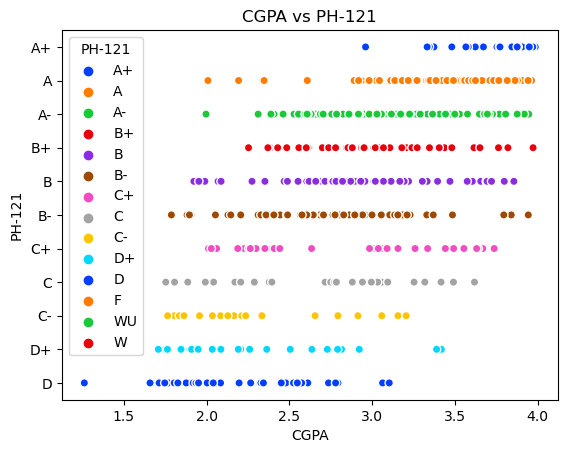

In [68]:
col = categorical_col[0]
sns.scatterplot(x="CGPA", y=f"{col}", hue=f"{col}", data=df, linewidth=1, palette='bright')
plt.ylabel(f"{col}")
plt.title(f"CGPA vs {col}")
plt.show()

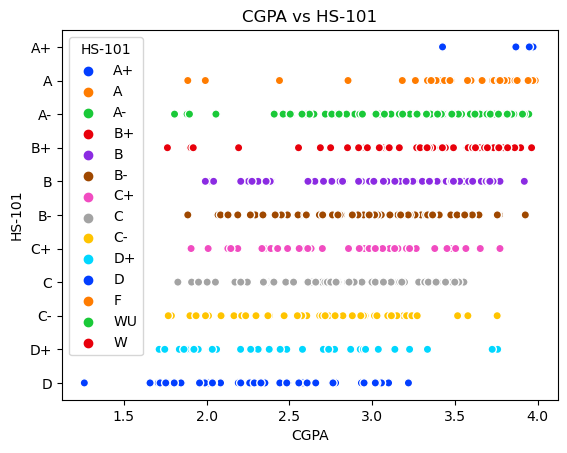

In [69]:
col = categorical_col[1]
sns.scatterplot(x="CGPA", y=f"{col}", hue=f"{col}", data=df, linewidth=1, palette='bright')
plt.ylabel(f"{col}")
plt.title(f"CGPA vs {col}")
plt.show()

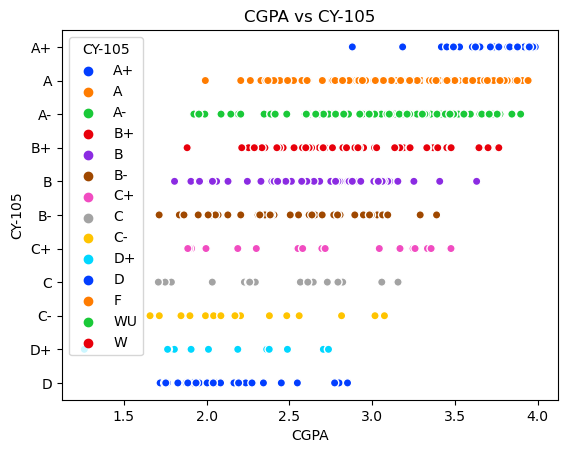

In [70]:
col = categorical_col[2]
sns.scatterplot(x="CGPA", y=f"{col}", hue=f"{col}", data=df, linewidth=1, palette='bright')
plt.ylabel(f"{col}")
plt.title(f"CGPA vs {col}")
plt.show()

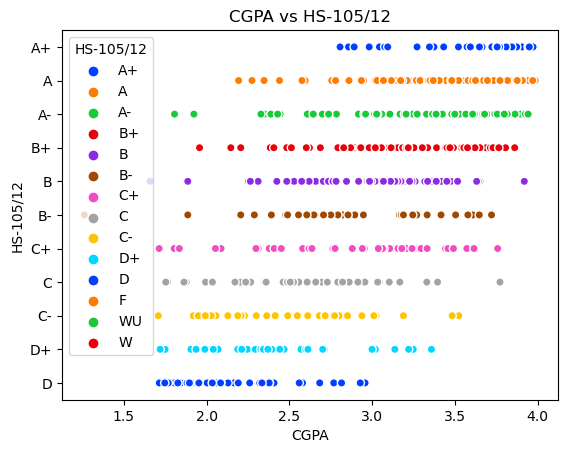

In [71]:
col = categorical_col[3]
sns.scatterplot(x="CGPA", y=f"{col}", hue=f"{col}", data=df, linewidth=1, palette='bright')
plt.ylabel(f"{col}")
plt.title(f"CGPA vs {col}")
plt.show()

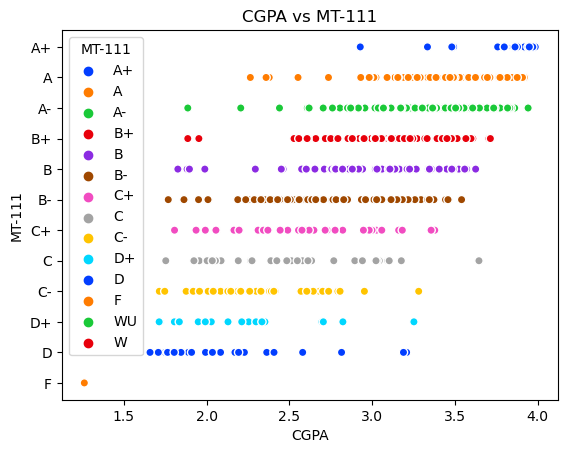

In [72]:
col = categorical_col[4]
sns.scatterplot(x="CGPA", y=f"{col}", hue=f"{col}", data=df, linewidth=1, palette='bright')
plt.ylabel(f"{col}")
plt.title(f"CGPA vs {col}")
plt.show()

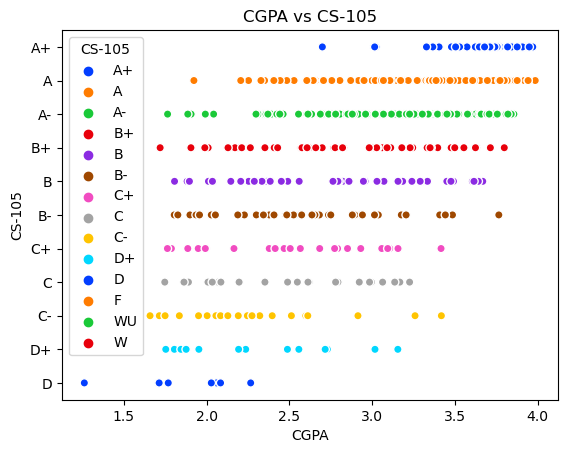

In [73]:
col = categorical_col[5]
sns.scatterplot(x="CGPA", y=f"{col}", hue=f"{col}", data=df, linewidth=1, palette='bright')
plt.ylabel(f"{col}")
plt.title(f"CGPA vs {col}")
plt.show()

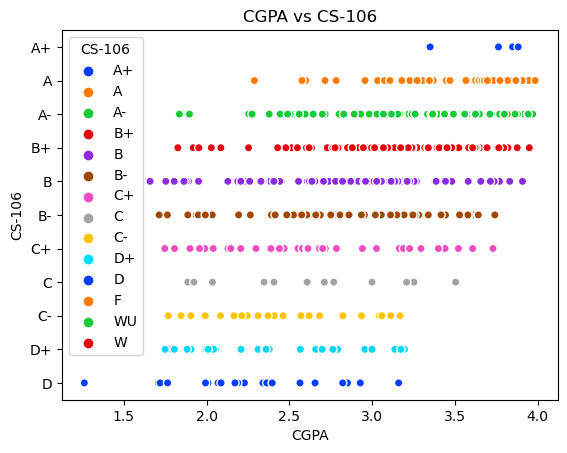

In [74]:
col = categorical_col[6]
sns.scatterplot(x="CGPA", y=f"{col}", hue=f"{col}", data=df, linewidth=1, palette='bright')
plt.ylabel(f"{col}")
plt.title(f"CGPA vs {col}")
plt.show()

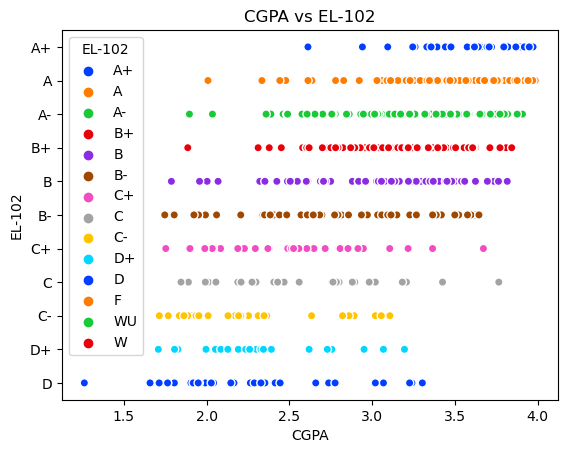

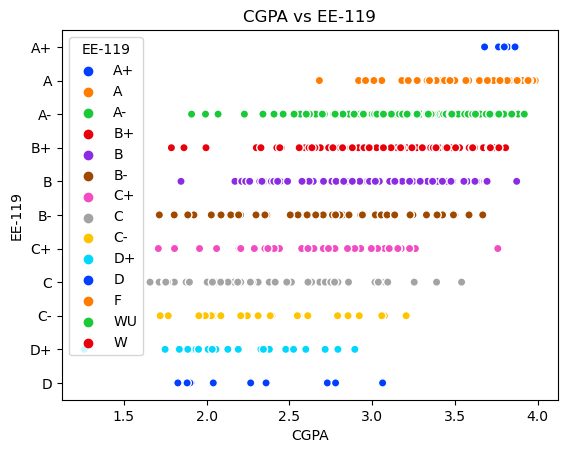

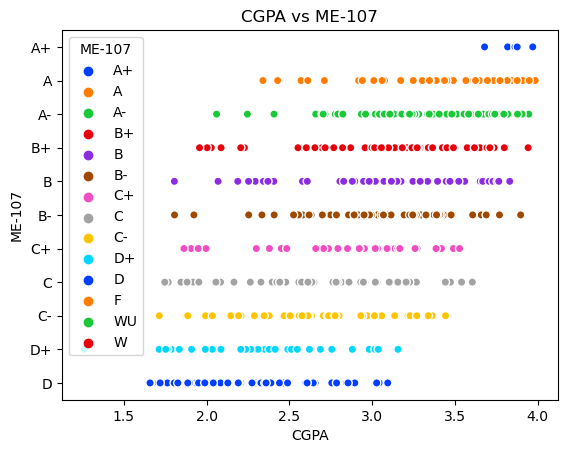

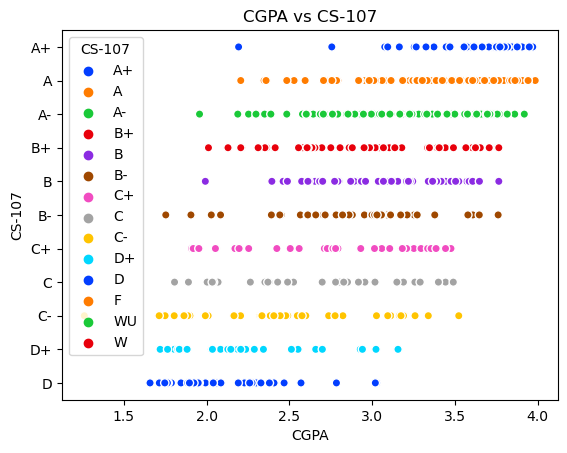

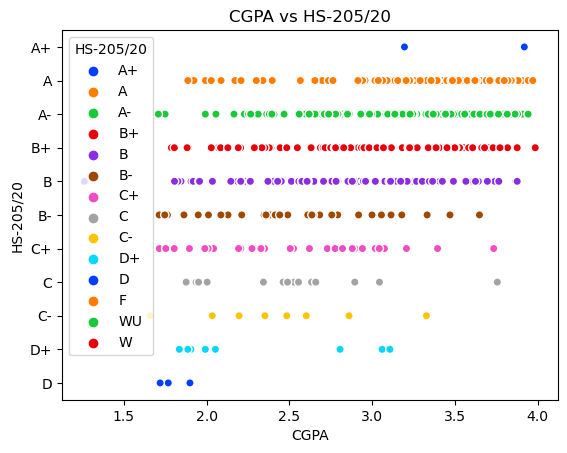

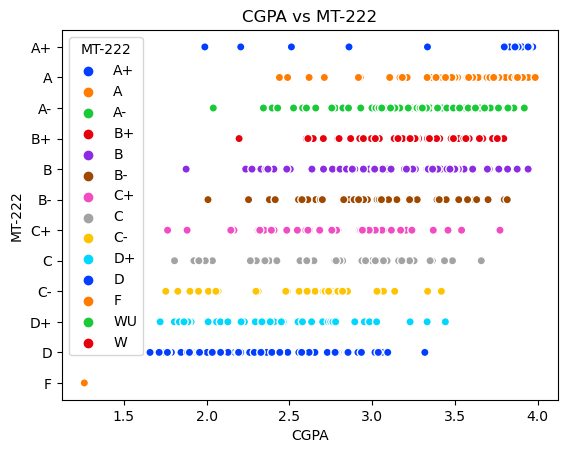

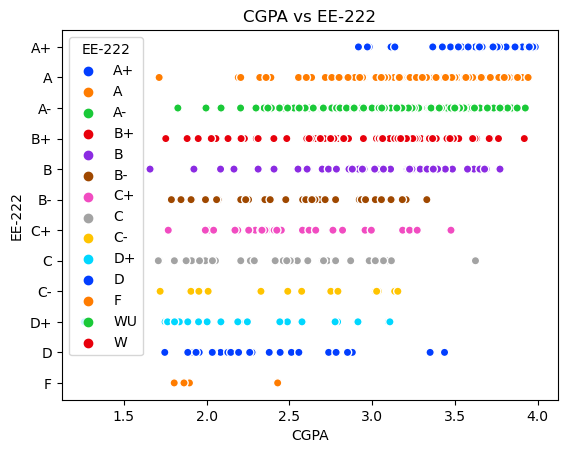

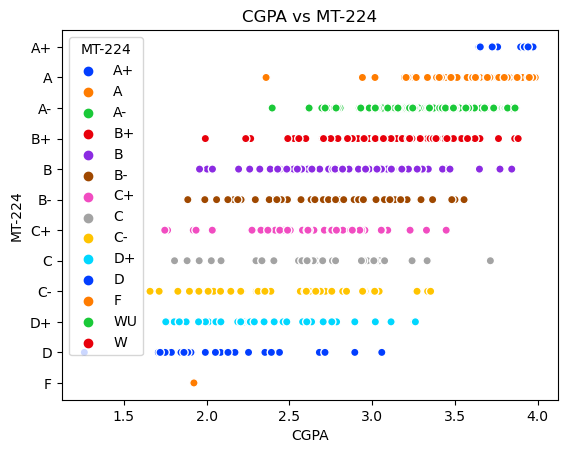

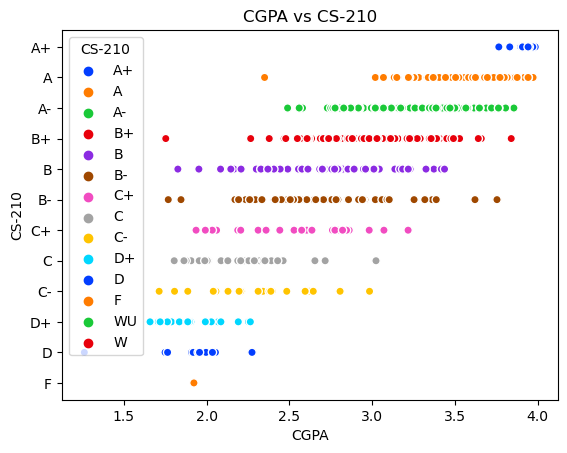

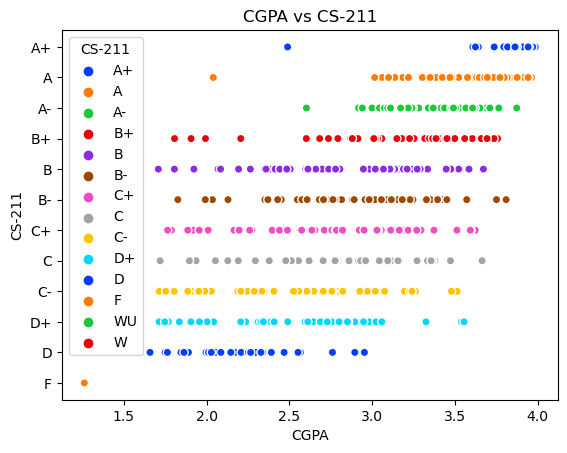

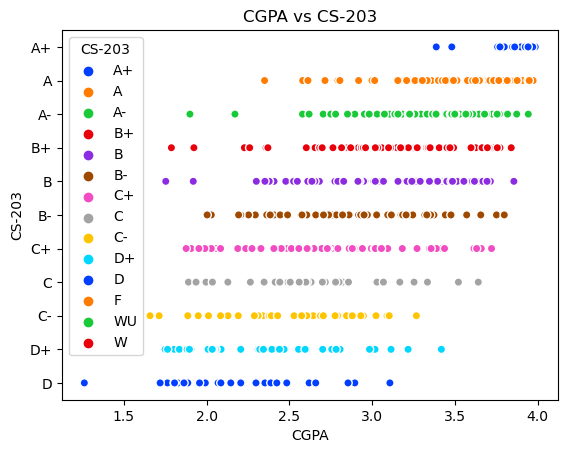

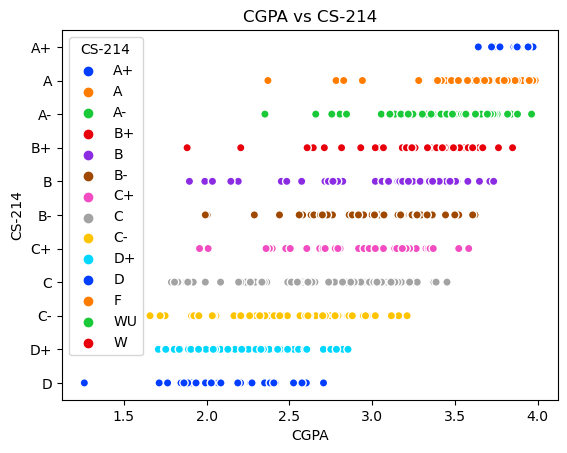

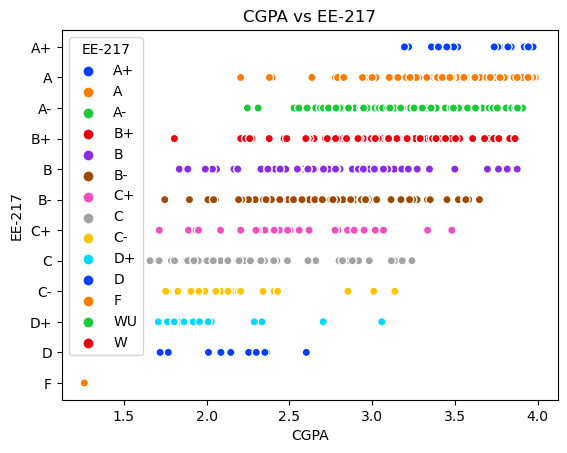

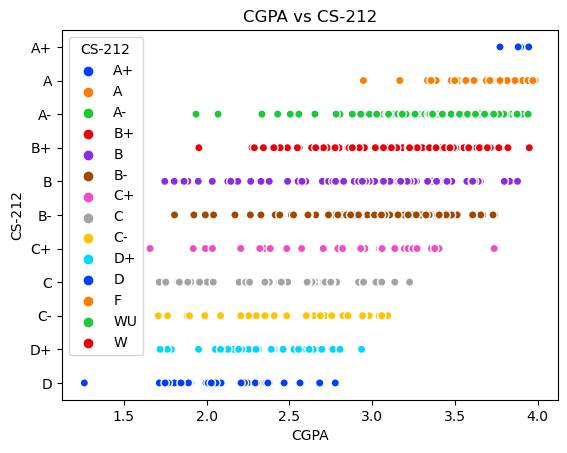

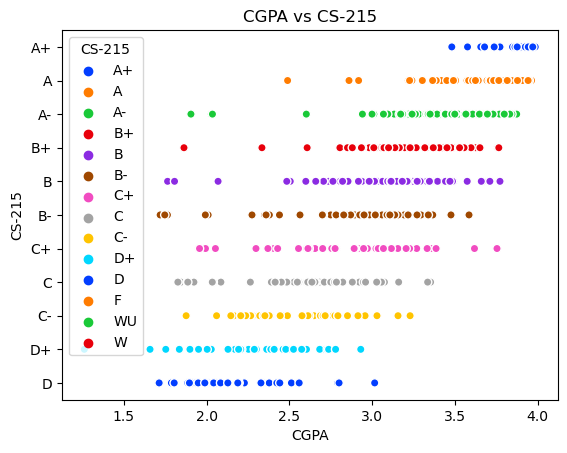

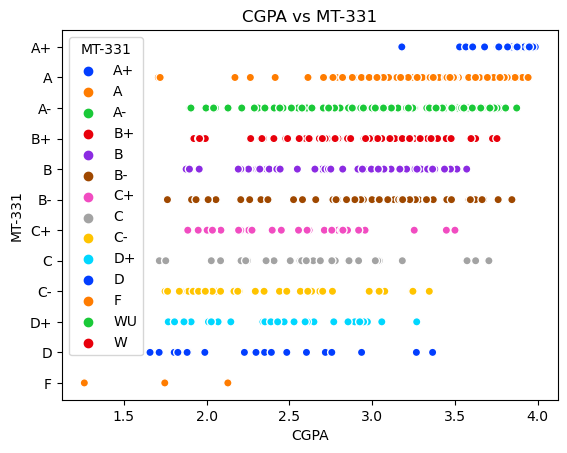

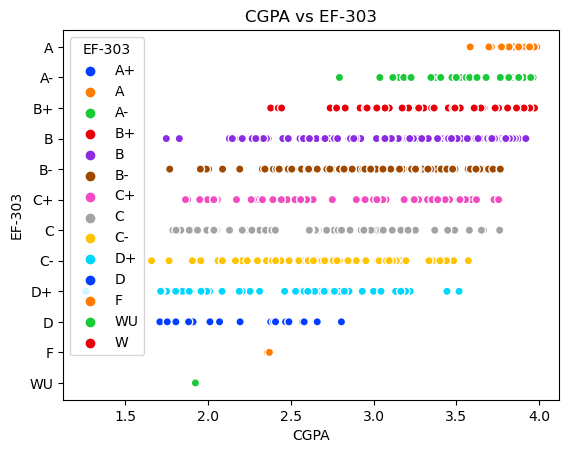

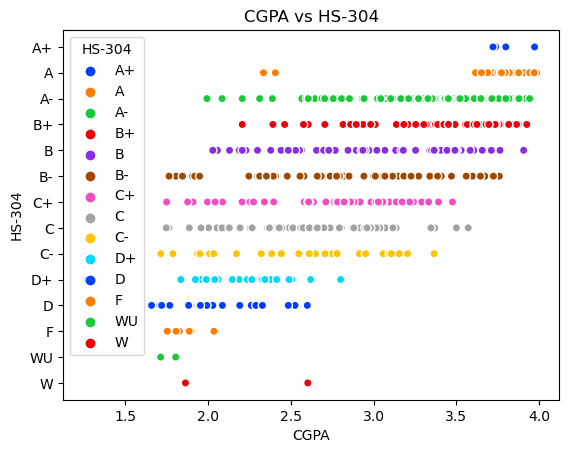

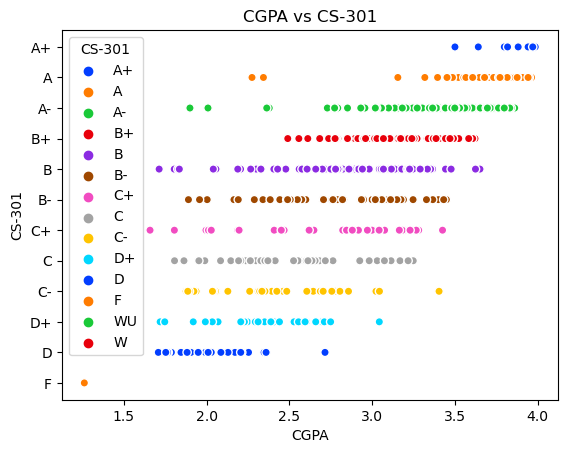

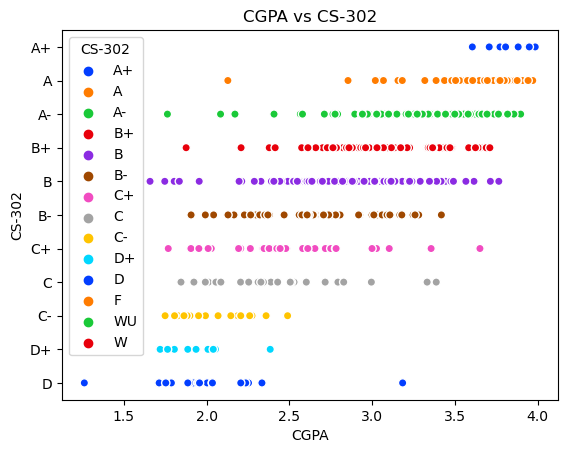

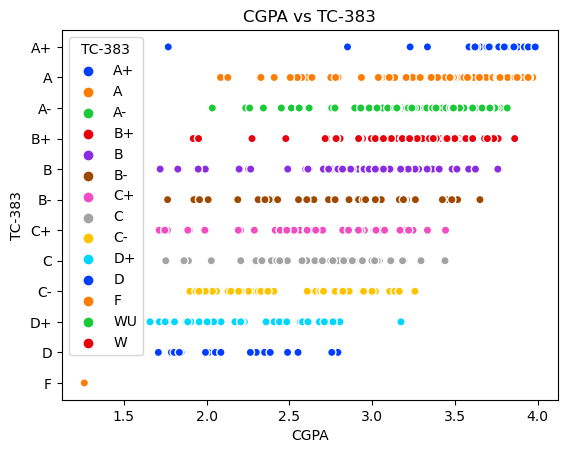

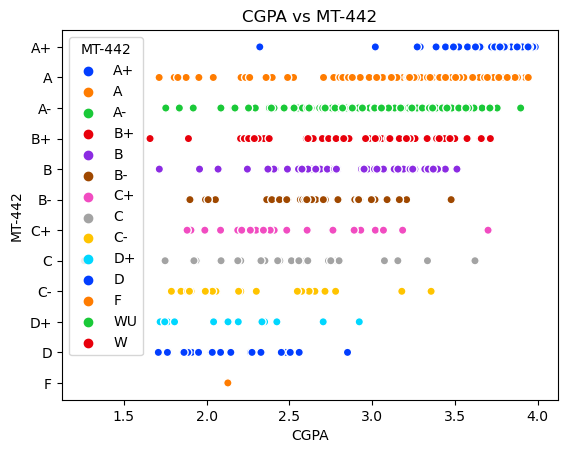

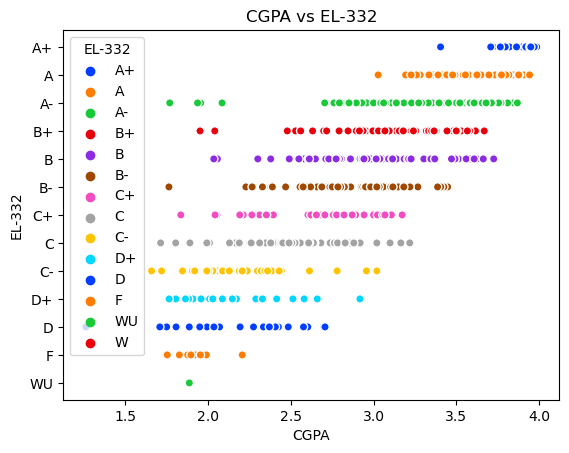

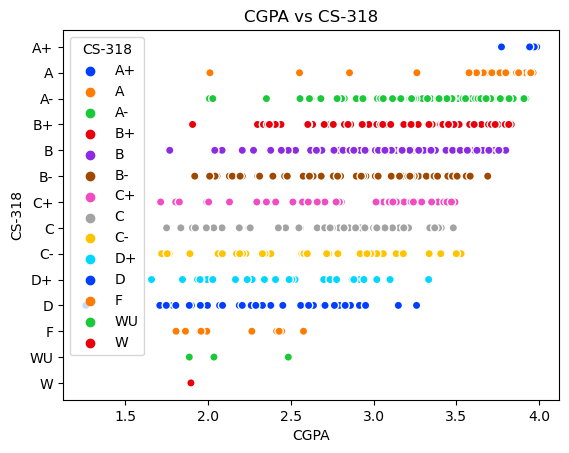

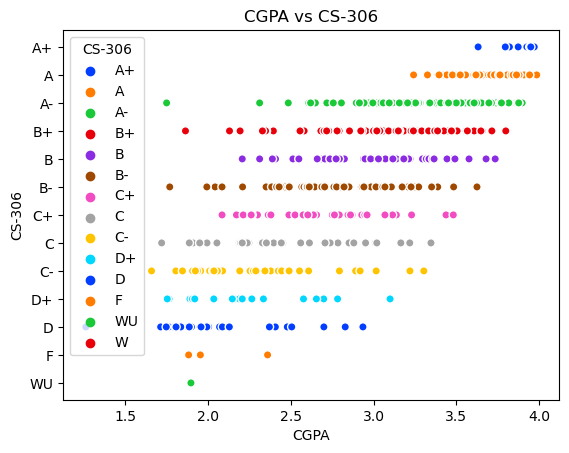

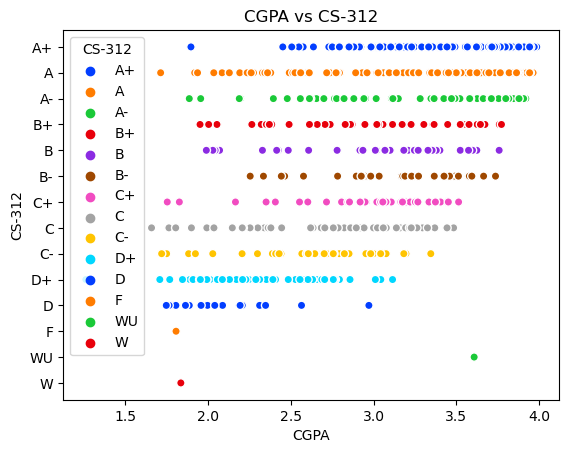

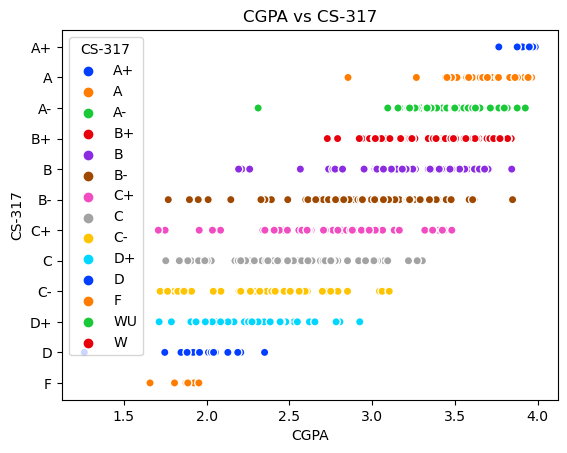

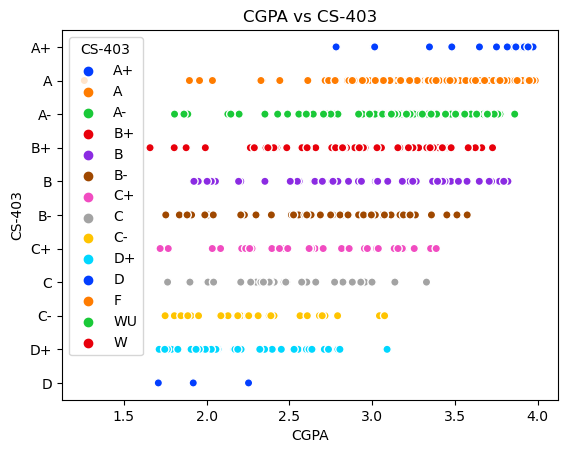

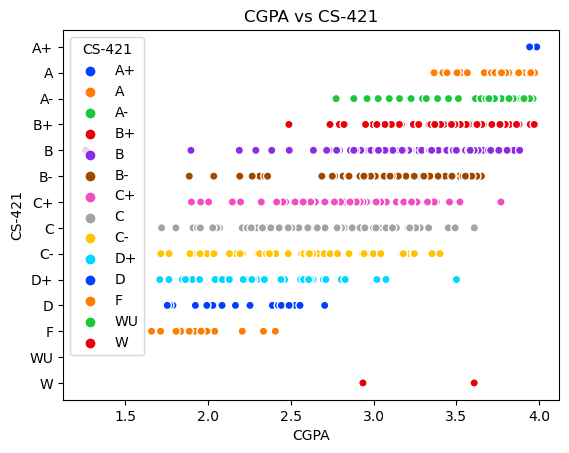

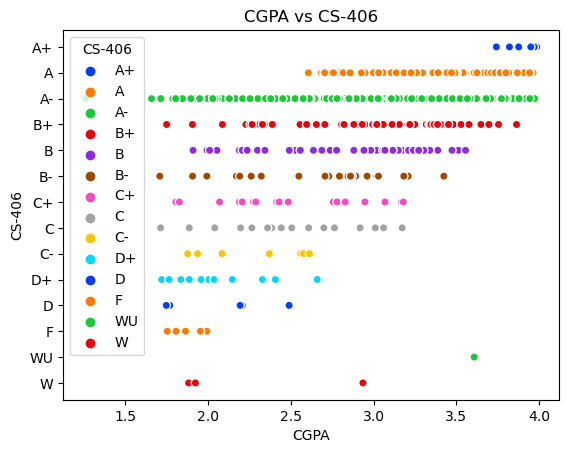

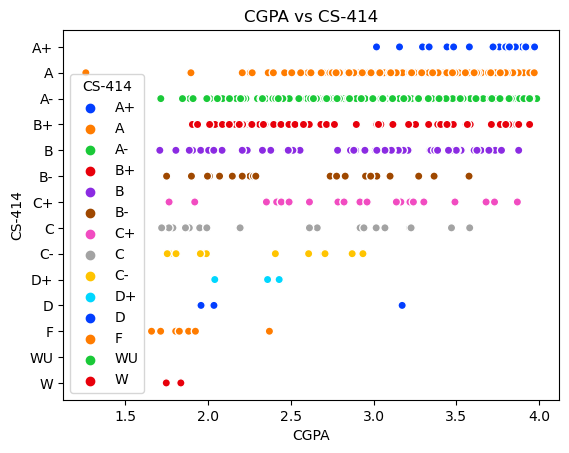

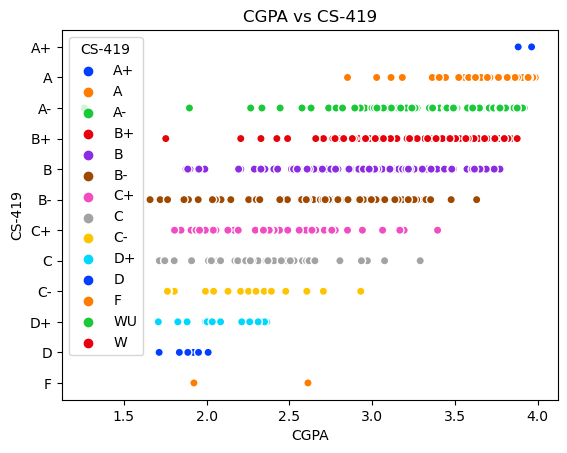

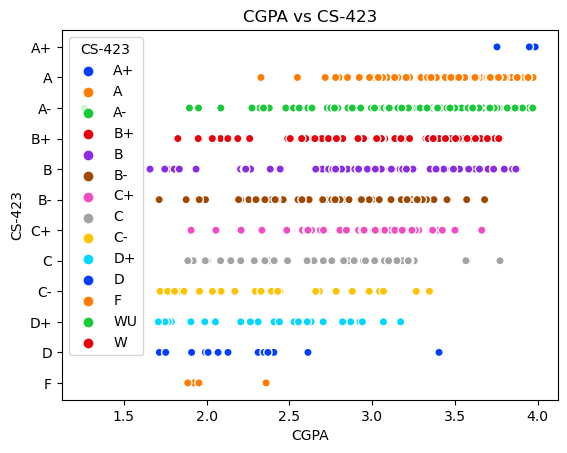

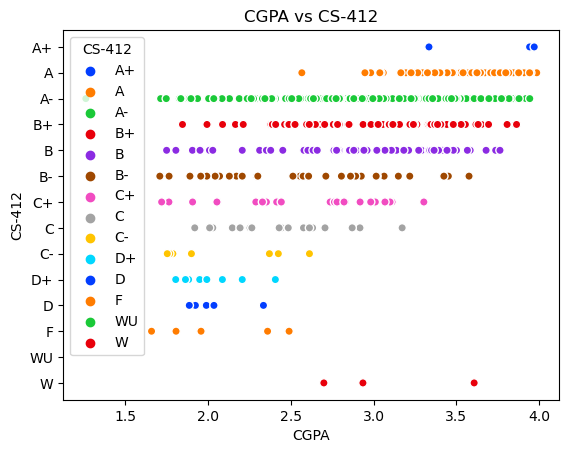

In [75]:
for col in categorical_col[7:]:
    sns.scatterplot(x="CGPA", y=f"{col}", hue=f"{col}", data=df, linewidth=1, palette='bright')
    plt.ylabel(f"{col}")
    plt.title(f"CGPA vs {col}")
    plt.show()

In [76]:
from sklearn.preprocessing import OrdinalEncoder
OE = OrdinalEncoder()

for i in categorical_col:
    df[i] = OE.fit_transform(df[i].values.reshape(-1, 1))

df

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,5.0,10.0,8.0,6.0,8.0,10.0,9.0,8.0,5.0,8.0,...,8.0,8.0,8.0,8.0,2.0,0.0,8.0,3.0,2.0,2.205
1,0.0,9.0,10.0,9.0,5.0,6.0,9.0,0.0,10.0,9.0,...,10.0,9.0,6.0,9.0,2.0,5.0,6.0,6.0,3.0,2.008
2,0.0,3.0,0.0,5.0,4.0,0.0,5.0,4.0,2.0,2.0,...,3.0,3.0,0.0,6.0,0.0,0.0,0.0,2.0,0.0,3.608
3,9.0,7.0,10.0,9.0,9.0,2.0,10.0,8.0,9.0,7.0,...,10.0,6.0,10.0,8.0,5.0,3.0,7.0,7.0,7.0,1.906
4,2.0,2.0,2.0,4.0,0.0,0.0,2.0,4.0,0.0,2.0,...,5.0,4.0,4.0,5.0,2.0,0.0,2.0,2.0,0.0,3.448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,3.0,0.0,0.0,2.0,1.0,0.0,2.0,2.0,1.0,4.0,...,2.0,2.0,0.0,0.0,0.0,4.0,4.0,3.0,0.0,3.798
567,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,...,4.0,4.0,0.0,0.0,2.0,3.0,2.0,6.0,2.0,3.772
568,3.0,0.0,2.0,4.0,0.0,0.0,0.0,0.0,0.0,3.0,...,2.0,3.0,0.0,4.0,0.0,6.0,4.0,2.0,2.0,3.470
569,0.0,4.0,9.0,0.0,9.0,10.0,5.0,8.0,5.0,8.0,...,9.0,3.0,3.0,8.0,9.0,6.0,3.0,5.0,6.0,2.193


In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 561 entries, 0 to 570
Data columns (total 42 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   PH-121     561 non-null    float64
 1   HS-101     561 non-null    float64
 2   CY-105     561 non-null    float64
 3   HS-105/12  561 non-null    float64
 4   MT-111     561 non-null    float64
 5   CS-105     561 non-null    float64
 6   CS-106     561 non-null    float64
 7   EL-102     561 non-null    float64
 8   EE-119     561 non-null    float64
 9   ME-107     561 non-null    float64
 10  CS-107     561 non-null    float64
 11  HS-205/20  561 non-null    float64
 12  MT-222     561 non-null    float64
 13  EE-222     561 non-null    float64
 14  MT-224     561 non-null    float64
 15  CS-210     561 non-null    float64
 16  CS-211     561 non-null    float64
 17  CS-203     561 non-null    float64
 18  CS-214     561 non-null    float64
 19  EE-217     561 non-null    float64
 20  CS-212     561 

In [78]:
df.describe()


,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
count,561.000000,561.000000,561.000000,561.000000,561.000000,561.000000,561.000000,561.000000,561.000000,561.000000,...,561.000000,561.000000,561.000000,561.000000,561.000000,561.000000,561.000000,561.000000,561.000000,561.000000
mean,3.691622,5.028520,2.795009,4.176471,3.841355,2.766488,4.069519,3.884135,3.855615,4.723708,...,4.108734,4.832442,3.477718,5.427807,3.001783,2.440285,3.889483,4.001783,3.067736,2.977501
std,2.983182,2.777314,2.840846,3.148562,2.919418,2.639809,2.674045,2.960293,2.622466,3.102469,...,3.356861,2.764652,2.965869,2.734478,2.486750,2.500803,2.390886,2.807833,2.348794,0.594160
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.261000
25%,2.000000,3.000000,0.000000,2.000000,2.000000,0.000000,2.000000,2.000000,2.000000,2.000000,...,1.000000,3.000000,1.000000,3.000000,2.000000,0.000000,2.000000,2.000000,2.000000,2.564000
50%,3.000000,5.000000,2.000000,4.000000,3.000000,2.000000,4.000000,3.000000,3.000000,4.000000,...,4.000000,5.000000,3.000000,5.000000,2.000000,2.000000,4.000000,4.000000,2.000000,3.042000
75%,6.000000,7.000000,4.000000,7.000000,6.000000,4.000000,5.000000,6.000000,6.000000,7.000000,...,7.000000,7.000000,5.000000,7.000000,4.000000,4.000000,5.000000,6.000000,4.000000,3.458000
max,10.000000,10.000000,10.000000,10.000000,11.000000,10.000000,10.000000,10.000000,10.000000,10.000000,...,13.000000,11.000000,10.000000,12.000000,13.000000,12.000000,11.000000,11.000000,12.000000,3.985000


In [ ]:
grid = sns.pairplot(df, palette = "bright")

for ax in grid.axes.flat[1:-1]:
    if ax.get_xlabel() != ax.get_ylabel():
        sns.regplot(data=df, x=ax.get_xlabel(), y=ax.get_ylabel(), scatter=False, ax=ax, color='b')

plt.show()